In [21]:
import numpy as np
import math
import scipy.constants as const
import uncertainties as unc
import uncertainties.unumpy as unp
import matplotlib.pyplot as plt
import pandas as pd
from lmfit.models import LinearModel
%matplotlib inline

In [22]:
data = pd.read_csv('Dose.csv')
hl1 = data['HL1']
hl2 = data['HL2']
hl3 = data['HL3']
data

,Region,Current,CE,Pass,Diameter,DE,HL1,HL2,HL3
0,1,0.0077,0.000077,1,8.0,0.5,4020,11740,10640
1,2,0.0240,0.000240,1,10.5,0.5,1320,3380,3660
2,3,0.0800,0.000800,1,14.0,2.0,850,2030,2160
3,4,0.4300,0.004300,1,30.0,2.0,810,610,970
4,5,0.7900,0.007900,2,38.0,2.0,880,780,880
5,6,0.7900,0.007900,10,38.0,2.0,690,600,780


In [23]:
#dwell has unit ns
dwell = 1e-6

#current has unit A
current = []
# current = unc.ufloat(data['Current'],data['CE'])   
for i in [0,1,2,3,4,5]:
    current.append(unc.ufloat(data['Current'][i],  data['CE'][i])*1e-9)
overlap = 2
multip =  data['Pass']

#diameter has unit m
diameter = []
for i in [0,1,2,3,4,5]:
    diameter.append(unc.ufloat(data['Diameter'][i],  data['DE'][i])*1e-9)
radius = []
for i in [0,1,2,3,4,5]:
    radius.append(diameter[i]/2)
ctoe = 6.242e18

#dose in  cm^-2
dose = []
for i in [5,4,3,2,1,0]:
    dose.append(current[i]*ctoe*dwell*overlap*multip[i]/(math.pi*radius[i]**2)/(100)**2)


In [24]:
dose_value = unp.nominal_values(dose)

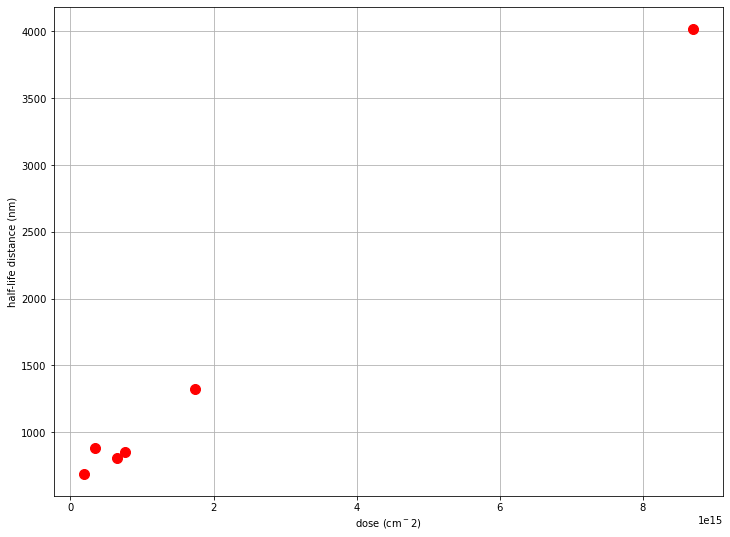

In [25]:
myfig = plt.figure(figsize=(12,9))
plt.grid()
plt.xlabel(r'dose (cm$^-2$)')
plt.ylabel(r'half-life distance (nm)')
plt.plot(dose_value, hl1,'.r', markersize = 20)


[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 4
    # data points      = 6
    # variables        = 2
    chi-square         = 24471.4585
    reduced chi-square = 6117.86462
    Akaike info crit   = 53.8810197
    Bayesian info crit = 53.4645387
    R-squared          = 0.99704846
[[Variables]]
    slope:      3.9035e-13 +/- 1.0619e-14 (2.72%) (init = 3.903462e-13)
    intercept:  622.868828 +/- 38.7270068 (6.22%) (init = 622.8688)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.566

Slope =  3.9034622173757774e-13 +/- 1.0619061517491332e-14


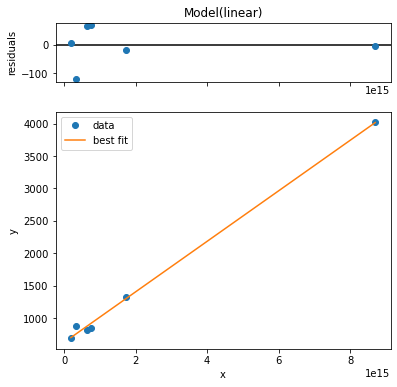

In [26]:
line = LinearModel()
param_guess = line.guess(hl1,x=dose_value)
line_fit = line.fit(hl1, param_guess, x = dose_value)
print(line_fit.fit_report())
print('\nSlope = ',line_fit.params['slope'].value,'+/-',line_fit.params['slope'].stderr)
s11 = line_fit.params['slope'].value
line_fit.plot();

In [36]:
a = [0,1,2,3,4,5]
a[1:2]

[1]

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 4
    # data points      = 3
    # variables        = 2
    chi-square         = 233734.990
    reduced chi-square = 233734.990
    Akaike info crit   = 37.7899928
    Bayesian info crit = 35.9872174
    R-squared          = 0.96006760
[[Variables]]
    slope:      7.2026e-12 +/- 1.4689e-12 (20.39%) (init = 7.202625e-12)
    intercept: -784.188258 +/- 644.333836 (82.17%) (init = -784.1883)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.901

Slope =  7.2026246853445646e-12 +/- 1.46893505214714e-12


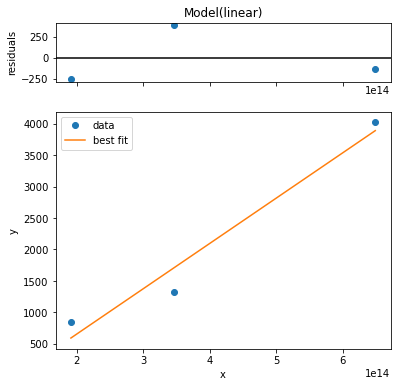

In [38]:
line = LinearModel()
param_guess = line.guess(hl1[0:3],x=dose_value[3:6])
line_fit = line.fit(hl1[0:3], param_guess, x = dose_value[3:6])
print(line_fit.fit_report())
print('\nSlope = ',line_fit.params['slope'].value,'+/-',line_fit.params['slope'].stderr)
s11 = line_fit.params['slope'].value
line_fit.plot();

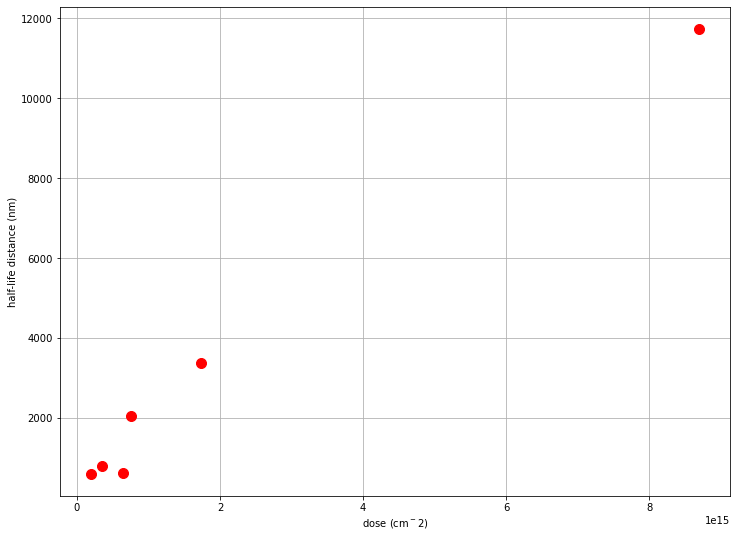

In [27]:
myfig = plt.figure(figsize=(12,9))
plt.grid()
plt.xlabel(r'dose (cm$^-2$)')
plt.ylabel(r'half-life distance (nm)')
plt.plot(dose_value, hl2,'.r', markersize = 20)

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 4
    # data points      = 6
    # variables        = 2
    chi-square         = 1269114.51
    reduced chi-square = 317278.627
    Akaike info crit   = 77.5724230
    Bayesian info crit = 77.1559420
    R-squared          = 0.98644931
[[Variables]]
    slope:      1.3049e-12 +/- 7.6473e-14 (5.86%) (init = 1.304948e-12)
    intercept:  497.289432 +/- 278.890934 (56.08%) (init = 497.2894)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.566

Slope =  1.3049481297259152e-12 +/- 7.647272877373568e-14


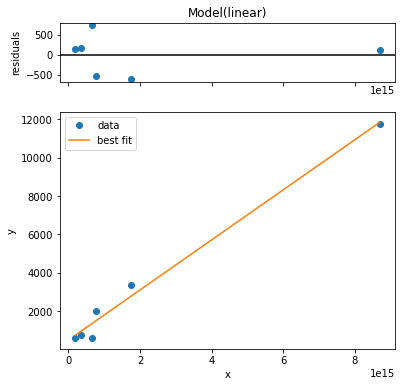

In [28]:
line = LinearModel()
param_guess = line.guess(hl1,x=dose_value)
line_fit = line.fit(hl1, param_guess, x = dose_value)
print(line_fit.fit_report())
print('\nSlope = ',line_fit.params['slope'].value,'+/-',line_fit.params['slope'].stderr)
s11 = line_fit.params['slope'].value
line_fit.plot();

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 4
    # data points      = 3
    # variables        = 2
    chi-square         = 2411325.17
    reduced chi-square = 2411325.17
    Akaike info crit   = 44.7912242
    Bayesian info crit = 42.9884488
    R-squared          = 0.95642084
[[Variables]]
    slope:      2.2103e-11 +/- 4.7181e-12 (21.35%) (init = 2.210313e-11)
    intercept: -3021.69319 +/- 2069.55492 (68.49%) (init = -3021.693)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.901

Slope =  2.210312523894349e-11 +/- 4.718115930045028e-12


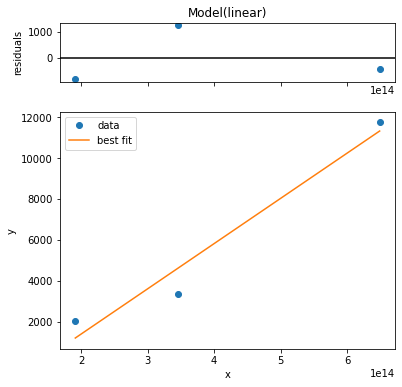

In [39]:
line = LinearModel()
param_guess = line.guess(hl2[0:3],x=dose_value[3:6])
line_fit = line.fit(hl2[0:3], param_guess, x = dose_value[3:6])
print(line_fit.fit_report())
print('\nSlope = ',line_fit.params['slope'].value,'+/-',line_fit.params['slope'].stderr)
s11 = line_fit.params['slope'].value
line_fit.plot();

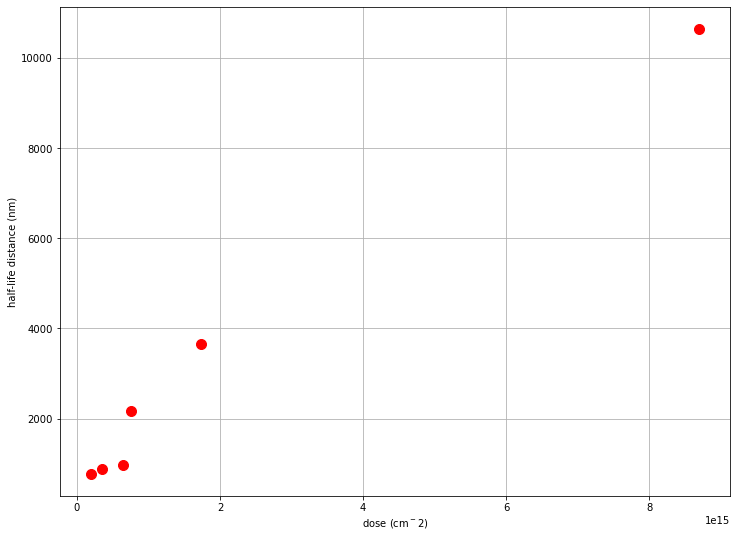

In [29]:
myfig = plt.figure(figsize=(12,9))
plt.grid()
plt.xlabel(r'dose (cm$^-2$)')
plt.ylabel(r'half-life distance (nm)')
plt.plot(dose_value, hl3,'.r', markersize = 20)

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 4
    # data points      = 6
    # variables        = 2
    chi-square         = 1491570.71
    reduced chi-square = 372892.678
    Akaike info crit   = 78.5414849
    Bayesian info crit = 78.1250039
    R-squared          = 0.97952728
[[Variables]]
    slope:      1.1469e-12 +/- 8.2905e-14 (7.23%) (init = 1.146908e-12)
    intercept:  815.065891 +/- 302.347179 (37.09%) (init = 815.0659)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.566

Slope =  1.1469079826540733e-12 +/- 8.290450370042877e-14


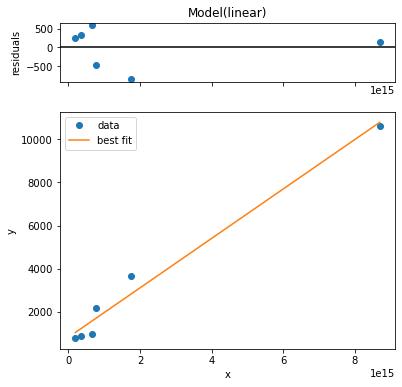

In [30]:
line = LinearModel()
param_guess = line.guess(hl3,x=dose_value)
line_fit = line.fit(hl3, param_guess, x = dose_value)
print(line_fit.fit_report())
print('\nSlope = ',line_fit.params['slope'].value,'+/-',line_fit.params['slope'].stderr)
s11 = line_fit.params['slope'].value
line_fit.plot();

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 4
    # data points      = 3
    # variables        = 2
    chi-square         = 1206681.77
    reduced chi-square = 1206681.77
    Akaike info crit   = 42.7143176
    Bayesian info crit = 40.9115421
    R-squared          = 0.97054019
[[Variables]]
    slope:      1.9157e-11 +/- 3.3376e-12 (17.42%) (init = 1.915706e-11)
    intercept: -2086.98128 +/- 1464.01470 (70.15%) (init = -2086.981)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.901

Slope =  1.91570605810025e-11 +/- 3.3376215352901544e-12


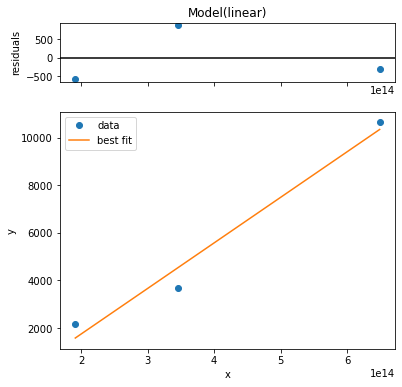

In [40]:
line = LinearModel()
param_guess = line.guess(hl3[0:3],x=dose_value[3:6])
line_fit = line.fit(hl3[0:3], param_guess, x = dose_value[3:6])
print(line_fit.fit_report())
print('\nSlope = ',line_fit.params['slope'].value,'+/-',line_fit.params['slope'].stderr)
s11 = line_fit.params['slope'].value
line_fit.plot();